In [4]:
# Step 1: Import Necessary Packages
# ------

import pandas as pd
import numpy as np
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [5]:
# Step 2: Load the Data
# ------

# read in data
data = pd.read_csv("model_data_pi.csv")
labels = ['PM2.5_pi', 'PM10_pi']

# drop rows with Nan values
data.dropna(inplace=True)
data = data.iloc[:138,1:]

# reset keys of dataset
data.reset_index(drop=True, inplace=True)

# split into training and test set
n = int(0.8*data.shape[0])
data_train = data.iloc[:n,:]
data_test = data.iloc[n:,:]

y_train_pm25 = data_train[labels[0]]
y_train_pm10 = data_train[labels[1]]
X_train = data_train.drop(labels, axis=1)

y_test_pm25 = data_test[labels[0]]
y_test_pm10 = data_test[labels[1]]
X_test = data_test.drop(labels, axis=1)

In [6]:
# Step 3: Fit the Ridge Regression Model
# ------

# define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alphas = arange(0, 1e-4, 5e-6)

# define model
model_pm10 = RidgeCV(alphas=alphas, cv=cv)
model_pm25 = RidgeCV(alphas=alphas, cv=cv)
# alpha = 2e-5
# model_pm10 = Ridge(alpha=2e-05)
# model_pm25 = Ridge(alpha=2e-05)

# fit model
model_pm10.fit(X_train, y_train_pm10)
model_pm25.fit(X_train, y_train_pm25)

# predict
y_pred_pm10 = model_pm10.predict(X_test)
y_pred_pm25 = model_pm25.predict(X_test)

# error
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
print(f'MSE PM10 = {mse_pm10} with alpha = {model_pm10.alpha_}')
# print(f'MSE PM10 = {mse_pm10}')

mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
print(f'MSE PM2.5 = {mse_pm25} with alpha = {model_pm25.alpha_}')
# print(f'MSE PM2.5 = {mse_pm25}')


MSE PM10 = 20.773383089337045 with alpha = 9.5e-05
MSE PM2.5 = 7.894283380897508 with alpha = 9.5e-05


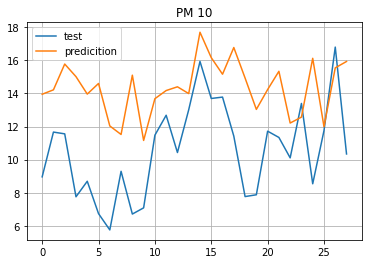

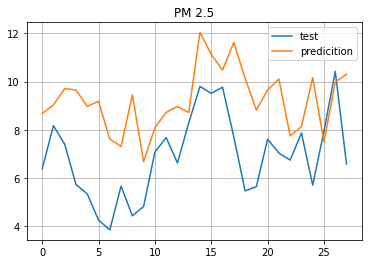

In [7]:
plt.plot(np.arange(len(y_test_pm10)), y_test_pm10, label='test')
plt.plot(np.arange(len(y_pred_pm10)), y_pred_pm10, label='predicition')
plt.title('PM 10')
plt.legend()
plt.grid()
plt.show()

plt.plot(np.arange(len(y_test_pm25)), y_test_pm25, label='test')
plt.plot(np.arange(len(y_pred_pm25)), y_pred_pm25, label='predicition')
plt.title('PM 2.5')
plt.legend()
plt.grid()
plt.show()

In [34]:
X_train.shape

(110, 37)